<a href="https://colab.research.google.com/github/TodorovManuel/TallerSoporteInfo/blob/main/Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   #importamos la libreria pandas para poder leer el csv
import numpy as np

print(pd.__version__);
print(np.__version__);

def arreglar_columnas(columnas):
  for i in range(len(columnas)):
      columnas[i] = columnas[i].replace(" ","")
  return columnas

def resolver_espacios(valor): #Funcion que elimina el espacio de delante y si el valor es nan o vacio, le pone None para que el dropna lo saque
    valor = str(valor)
    if valor[0] == ' ':
        valor = valor[1:]
    if valor == '':
        valor = np.nan
    if valor == 'nan':
        valor = np.nan
    return valor


def argentina(pais):
  if pais == "United States":
    pais="Argentina"
  return pais

def bitcoin(fuente):
  if fuente[0] == "m" or fuente[0] == "M":
    fuente="Bitcoin"
    return fuente
  else:
    return fuente

def sacarB(dinero):
  if dinero[-1] == "B":
    return dinero[:-1]
  else:
    return dinero


csv = pd.read_csv('./billonaresList.csv')
csvColumnas = list(csv.columns)

csv.columns = arreglar_columnas(csvColumnas) # se le aplica la funcion a la lista de columnas
csv = csv.applymap(resolver_espacios)



csv.dropna(inplace=True) # elimina las filas que contengan valores vacios

csv['COUNTRYOFRESIDENCE'] = csv['COUNTRYOFRESIDENCE'].apply(argentina)
csv['SOURCEOFINCOME'] = csv['SOURCEOFINCOME'].apply(bitcoin)
csv['NETWORTH(BILLIONS)'] = csv['NETWORTH(BILLIONS)'].apply(sacarB)



import matplotlib.pyplot as plt



# csv.to_csv('./nuevo.csv')
# print(csv)





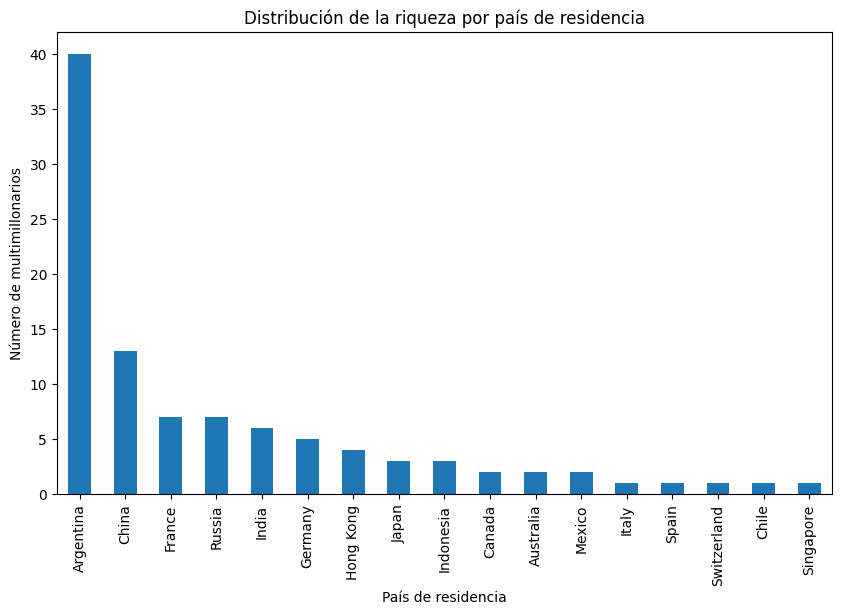

In [12]:
# Gráfico 1: Distribución de la riqueza por país de residencia
plt.figure(figsize=(10, 6))
csv['COUNTRYOFRESIDENCE'].value_counts().plot(kind='bar')
plt.title('Distribución de la riqueza por país de residencia')
plt.xlabel('País de residencia')
plt.ylabel('Número de multimillonarios')
plt.show()

# Distrubución de la riqueza por país de recidencia
La conclusión de este gráfico es que los argentinos tienen un talento especial para generar riqueza por encima de las otras nacionalidades.

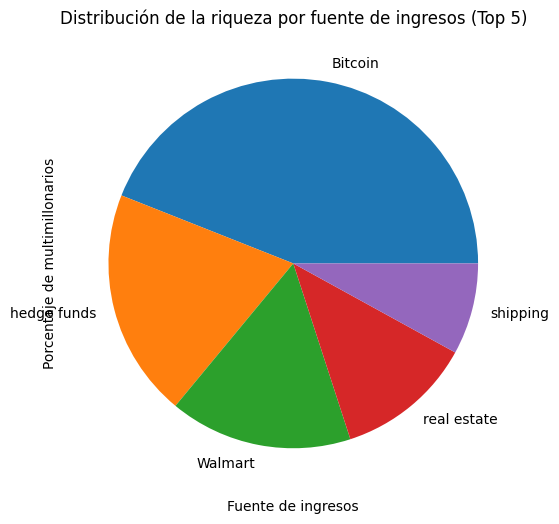

In [9]:
# Gráfico 2: Distribución de la riqueza por fuente de ingresos
plt.figure(figsize=(10, 6))
csv['SOURCEOFINCOME'].value_counts().head(5).plot(kind='pie')
plt.title('Distribución de la riqueza por fuente de ingresos (Top 5)')
plt.xlabel('Fuente de ingresos')
plt.ylabel('Porcentaje de multimillonarios')
plt.show()


# Distribución de la riqueza por fuentes de ingresos (Top 5)
La conclusión de este gráfico es que el Bitcoin fue la fuente de ingresos mas común entre los billonarios, luego los fondos de cobertura que también son un instrumento financiero ayudaron mucho a generar riqueza. La famosa empresa Walmart también fue de gran ayuda sin olvidarnos de las bienes raíces y los transportes de mercancía o importaciones.

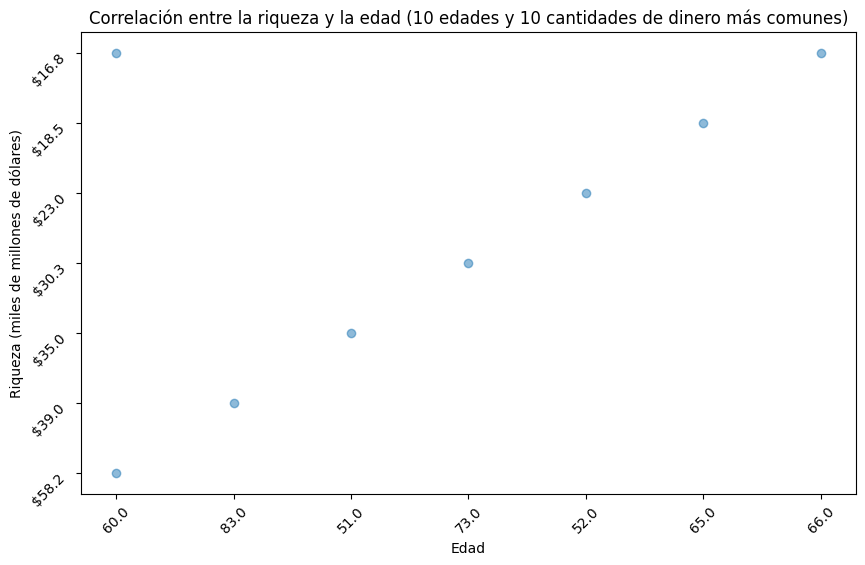

In [10]:
# Gráfico 3: Correlación entre la riqueza y la edad
# Filtrar el DataFrame para incluir solo las 10 edades más comunes
top_10_ages = csv['AGE'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo las 10 cantidades de dinero más comunes
top_10_net_worths = csv['NETWORTH(BILLIONS)'].value_counts().head(10).index

# Crear un nuevo DataFrame con solo las 10 edades y 10 cantidades de dinero más comunes
csv_top_10 = csv[(csv['AGE'].isin(top_10_ages)) & (csv['NETWORTH(BILLIONS)'].isin(top_10_net_worths))]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(csv_top_10['AGE'], csv_top_10['NETWORTH(BILLIONS)'], alpha=0.5)
plt.title('Correlación entre la riqueza y la edad (10 edades y 10 cantidades de dinero más comunes)')
plt.xlabel('Edad')
plt.ylabel('Riqueza (miles de millones de dólares)')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=45)  # Rota las etiquetas del eje y para mejorar la legibilidad
plt.show()

# Correlación entre la riqueza y la edad
La conclusión de este gráfico es que existe una correlación positiva entre la riqueza y la edad, lo que sugiere que los multimillonarios tienden a ser mayores.

# CONCLUSIÓN GENERAL
Lo que podemos aprender de estos datos es que los billonarios se crean de muchísimas maneras y hay muchas maneras de generar dinero, pero hay algunas que son más comúnes lo cuál significa que pueden ser sencillas pero ya hay mucha competencia.

También podemos observar la diferencia que hay entre los millonarios de diferentes regiones y como sus edades influyen en la riqueza generada, cuanta más experiencia de vida la probabilidad de tener una riqueza alta es mayor.

Otra curiosidad es que no todos los billonarios son famosos, de hecho pueden generar grandes sumas de dinero manteniendose en el anonimáto. De todas maneras el ser tan adinerados genera que terminen teniendo cierta prescencia en la sociedad.